In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filepath = Path.home() / "data/explorations/temp_min_sp/aaa.csv"

In [11]:
data = (pd.read_csv(filepath, skiprows=16, delimiter=";", 
                   decimal=",", parse_dates=["Data"])
          .set_index("Data")
          .assign(TempMinima=lambda x: pd.to_numeric(x["TempMinima"])))
          

In [12]:
data.columns

Index(['Estacao', 'Hora', 'TempMinima', 'Unnamed: 4'], dtype='object')

In [53]:
y = data["TempMinima"]
x = y.index

In [113]:
this_inds = (x >= "2019-01-01")
temp1 = y[this_inds].mean()
stemp1 = y[this_inds].std()

In [114]:
other_inds = (x.month < 5)
other_inds |= ((x.month == 5) & (x.day < 6))
other_inds &= x.year > 2010
temp2 = y[other_inds].mean()
stemp2 = y[other_inds].std()

In [115]:
other_inds2 = (x.month < 5)
other_inds2 |= ((x.month == 5) & (x.day < 6))
#other_inds2 &= x.year > 2010
temp3 = y[other_inds2].mean()
stemp3 = y[other_inds2].std()

In [116]:
el_nino_years = [2002, 2004, 2006, 2009, 2014, 2015]
other_inds3 = (x.month < 5)
other_inds3 |= ((x.month == 5) & (x.day < 6))
other_inds3 &= (x.year.isin(el_nino_years))
temp4 = y[other_inds3].mean()
stemp4 = y[other_inds3].std()

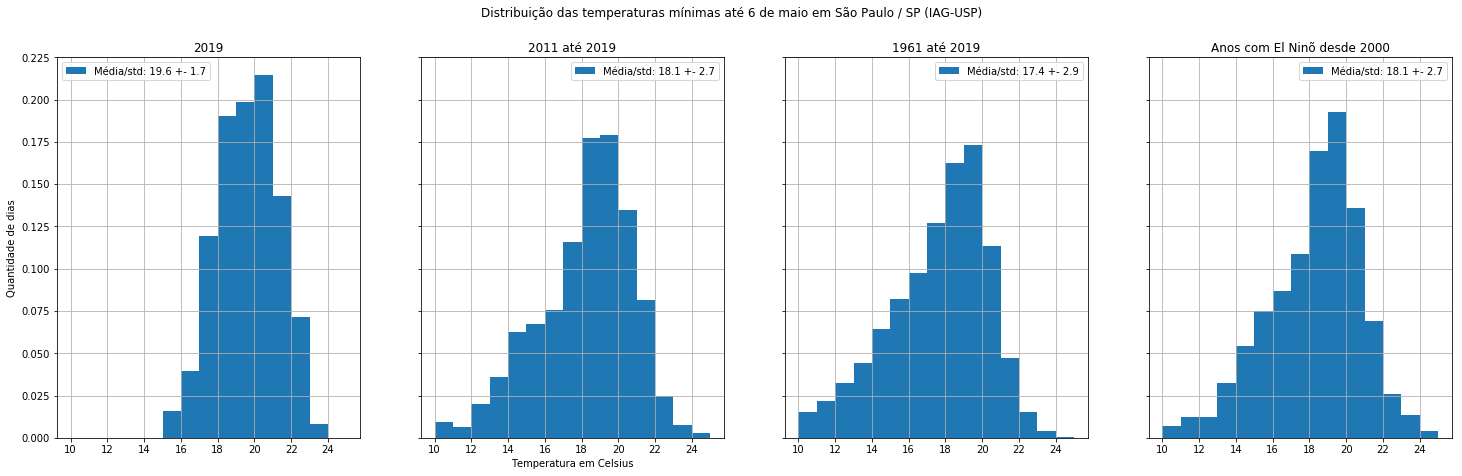

In [125]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 7), sharex=True, sharey=True)

ax1.hist(y.values[this_inds], density=True, range=(10, 25), bins=15, label="Média/std: {:.1f} +- {:.1f}".format(temp1, stemp1))
ax2.hist(y.values[other_inds], density=True,range=(10, 25), bins=15, label="Média/std: {:.1f} +- {:.1f}".format(temp2, stemp2))
ax3.hist(y.values[other_inds2], density=True,range=(10, 25), bins=15, label="Média/std: {:.1f} +- {:.1f}".format(temp3, stemp3))
ax4.hist(y.values[other_inds3], density=True,range=(10, 25), bins=15, label="Média/std: {:.1f} +- {:.1f}".format(temp4, stemp4))

plt.suptitle("Distribuição das temperaturas mínimas até 6 de maio em São Paulo / SP (IAG-USP)")

ax1.set_ylabel("Quantidade de dias")
ax2.set_xlabel("Temperatura em Celsius")
ax1.set_title("2019")
ax2.set_title("2011 até 2019")
ax3.set_title("1961 até 2019")
ax4.set_title("Anos com El Ninõ desde 2000")

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

plt.show()

In [38]:
plt.title("Distribuição das temperaturas mínimas até 6 de maio desde 2011")
plt.show()